# Credit Card Fraud Detection using Machine Learning in Python
we are going to predict whether a credit card is fraud or not using Machine Learning.

This dataset presents transactions that occurred in two days. The dataset is highly unbalanced.

Due to confidentiality issues, the input variables are transformed into numerical using PCA transformations.



## Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the data into python

In [60]:
df=pd.read_csv('C:/Users/Akshay Singh/Desktop/Python_Case_Study/creditcardfrauddetect.csv')

In [61]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## DATA EXPLORATION- To understand the overall data

In [4]:
##Descriptive statistics of the data
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Observation from describe function
Time column is not in standard measures , probably in seconds , but max of time is not equal to the length of the dataframe, so there sure are some transactions at the same time Amount Min is 0 , must observe that for some errors or outliers Unscaled amount with high possible skewness , based on min , max and mean Class Imbalance Issue surely Exists - Let's discuss this further

In [5]:
#Summarized information of data- Data types, Missing values based on number of non-null values Vs total rows etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Observation
1. All data types are float64 ,except 1 : Class
2. 28 columns have Sequential Names and values that don't make any logical sense - > V1 , V2 ....V28
3. 3 columns : TIME , AMOUNT and CLASS which can be analysed for various INSIGHTS !
4. Memory Usage : 64 MB , not so Harsh !!
5. Column names are not lower_case , must fix this : Standardisation ( Data Pre Processing Task 3)
6. Null values currently don't exist in any column , no missing values !

In [6]:
#Any null-Value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### No Missing Values in any column

In [7]:
#Number of Unique variable in each column
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

####  Data Exploration Results:
Target Variable: Class( Class =1 means Fraud transaction , Class=0 means non-fraud transaction )

Predictors:Time, Amount, V1-V28

No-Null Values in Any Column


#### Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML classification model, as the target variable is categorical.

 

## Looking at the distribution of Target variable

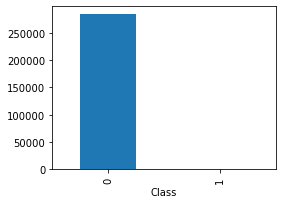

In [8]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=df.groupby('Class').size()
GroupedData.plot(kind='bar', figsize=(4,3))

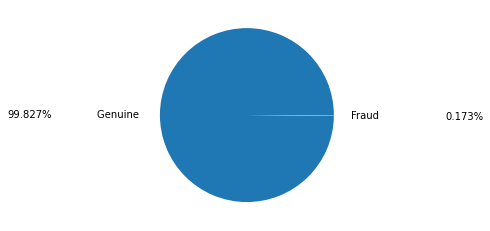

In [9]:
labels = ['Genuine ','Fraud ']
plt.pie(df['Class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)
plt.show()

In [10]:
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### Highly Skewed , Imbalanced Data wrt class



## Plotting histogram for Predictor Variables

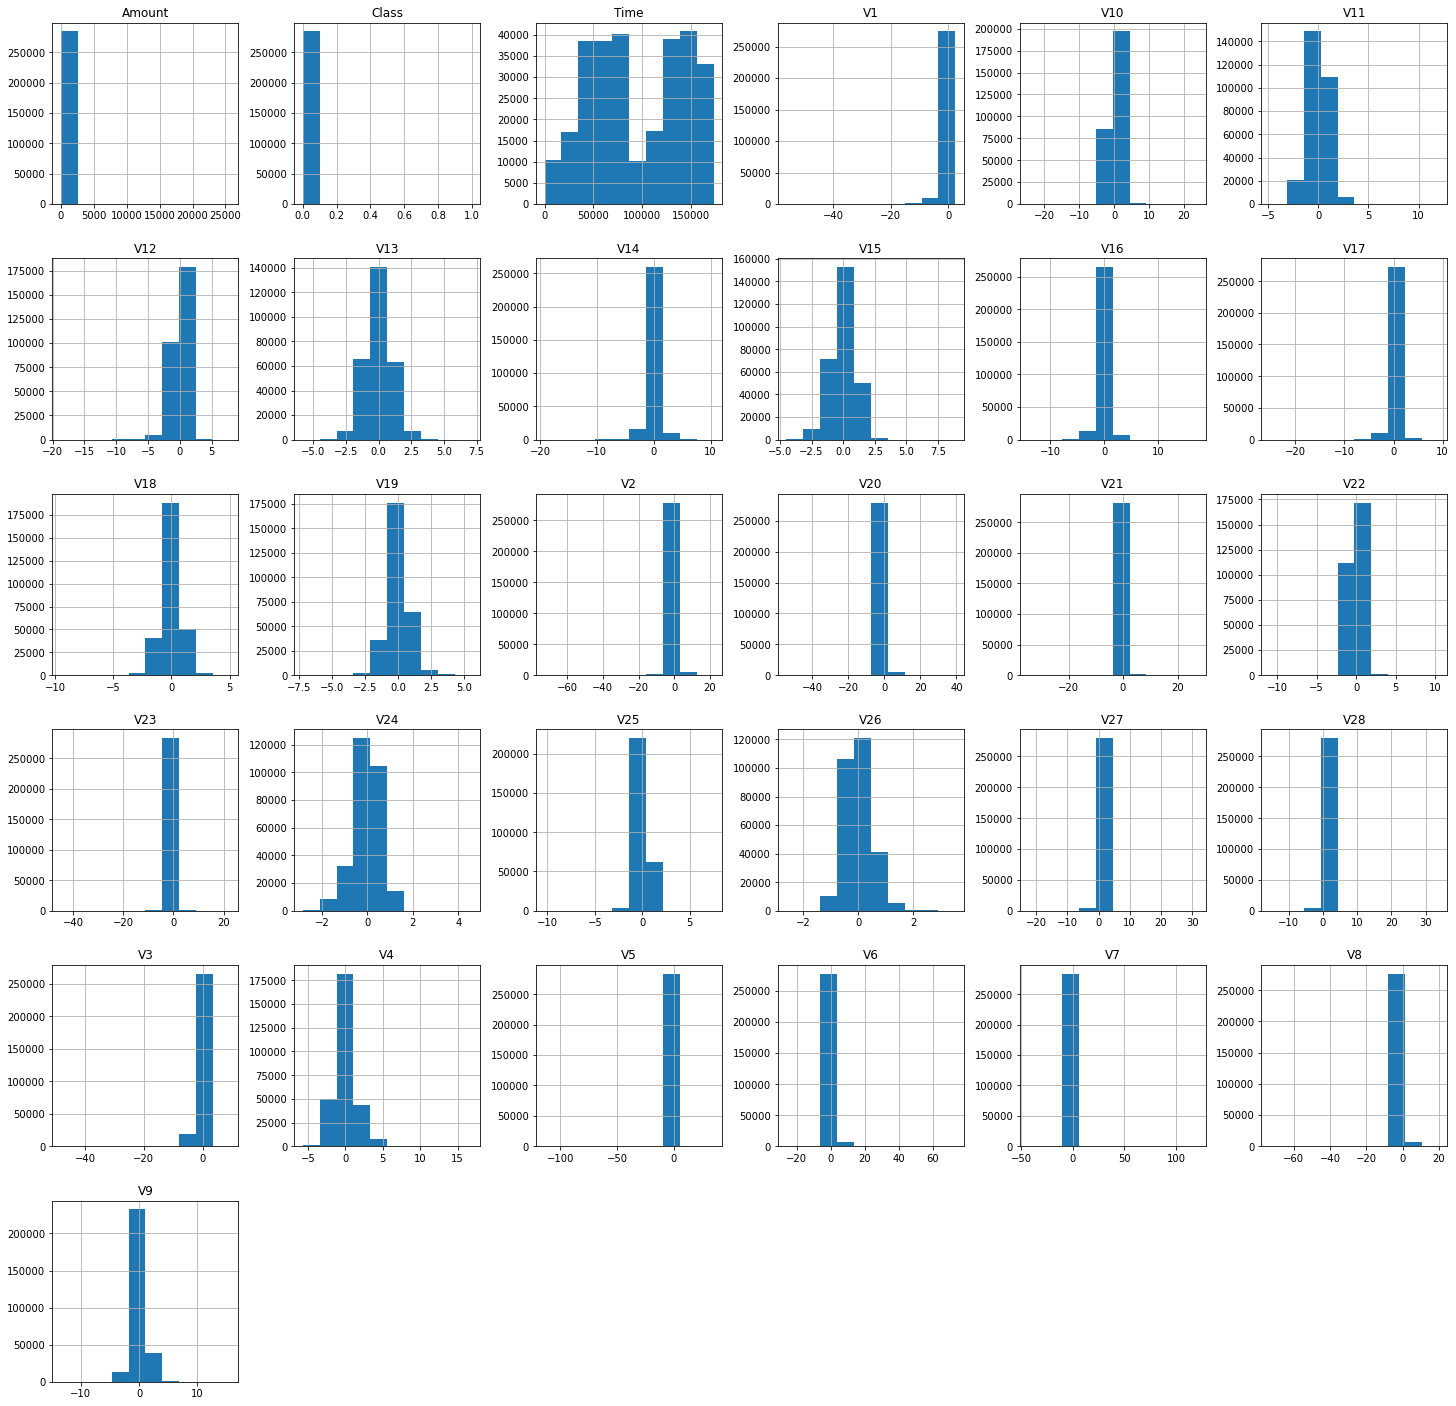

In [11]:
df.hist(figsize = (25,25))
plt.show()

## Looking at Amount Column

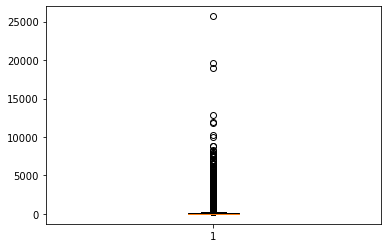

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df['Amount'])
plt.show()

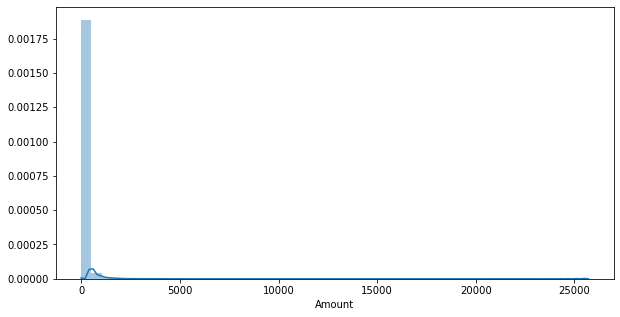

In [13]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [14]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
#Feature engineering to a better visualization of the values

df['amount_log'] = np.log(df.Amount + 0.01)

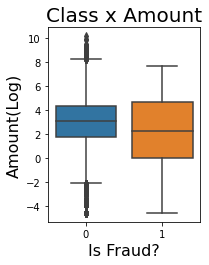

In [16]:
plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

#### Observation
Data Set with respect to Amount is highly skewed !
Lot of 0 value transaction




## Looking at Time column

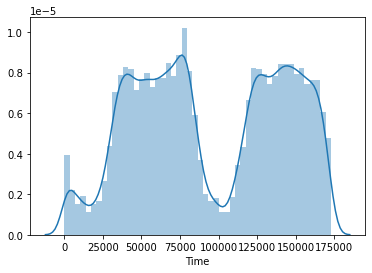

In [17]:
plt.figsize = (20,20)
sns.distplot(df['Time'])
plt.show()

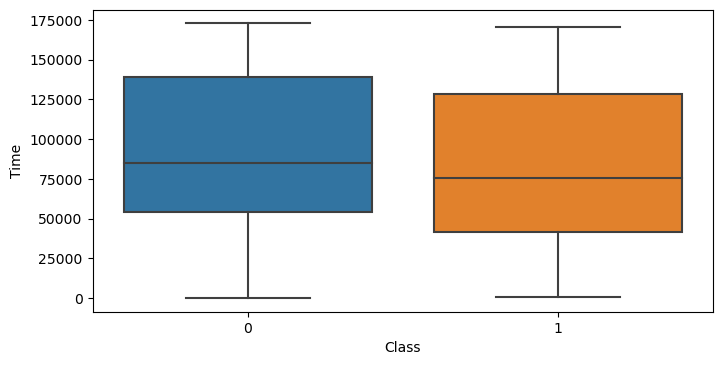

In [18]:
plt.figure(figsize = (8,4) , dpi = 100)
sns.boxplot(x ="Class",y="Time",data=df)
plt.show()

In [19]:
# We should use the %24 hours
df['Hour'] = df['Time']/(60*60)
df.reset_index(drop = True , inplace = True)

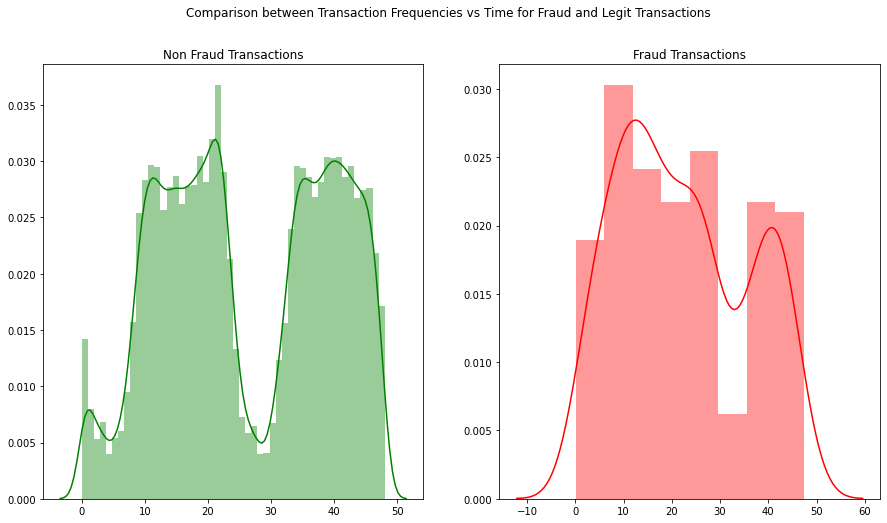

In [20]:
# Time plots 

fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.distplot(df[df['Class']==0]['Hour'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Non Fraud Transactions')

sns.distplot(df[df['Class']==1]['Hour'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Legit Transactions')
plt.show()

In [21]:
## Processing the Time Column

df['Hour'] = df['Time']/(60*60)%24   # 2 days of data

import math
df['Hour'] = df['Hour'].apply(lambda x : math.floor(x))

In [22]:
# Important to know the time span of the data -
print(df['Time'].min() / (60*60))
print(df['Time'].max() / (60*60)) 

0.0
47.99777777777778


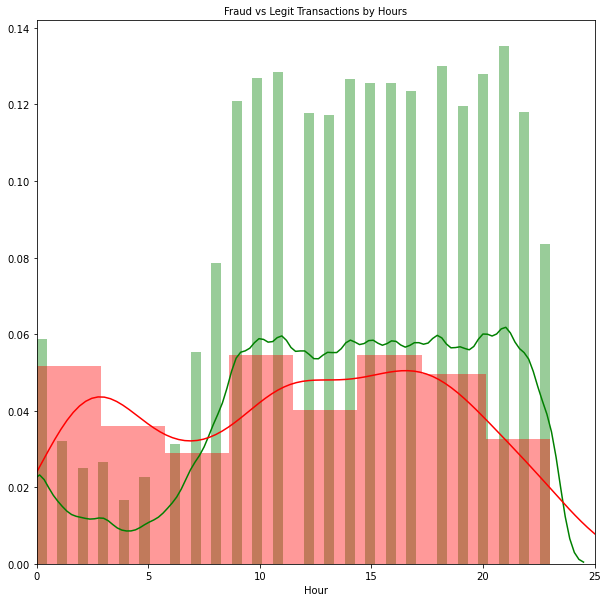

In [23]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Legit Transactions

plt.figure(figsize=(10,10))
sns.distplot(df[df['Class'] == 0]["Hour"], color='g') 
sns.distplot(df[df['Class'] == 1]["Hour"], color='r')

plt.title('Fraud vs Legit Transactions by Hours', fontsize=10)
plt.xlim([0,25])
plt.show()

In [24]:
# Observing patterns in No of Legit Transactions vs Time (Hour) to observe more

legit_hour_count = df[df['Class']==0].groupby(['Hour'] , as_index = False)['Hour'].size().reset_index(name = 'Count')

In [25]:
legit_hour_count.head()

,Hour,Count
0,0,7689
1,1,4210
2,2,3271
3,3,3475
4,4,2186


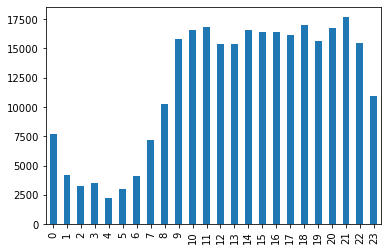

In [26]:
legit_hour_count['Count'].plot(kind = 'bar')

In [27]:
fraud_hour_count = df[df['Class']==1].groupby(['Hour'] , as_index = False)['Hour'].size().reset_index(name = 'Count')

In [28]:
fraud_hour_count.head()

,Hour,Count
0,0,6
1,1,10
2,2,57
3,3,17
4,4,23


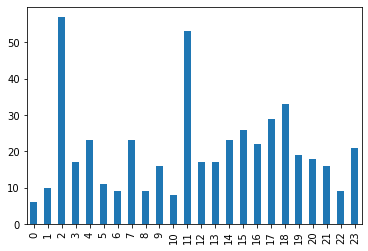

In [29]:
fraud_hour_count['Count'].plot(kind = 'bar') 

## Look at the amount distribution for fraud and not fraud transactions

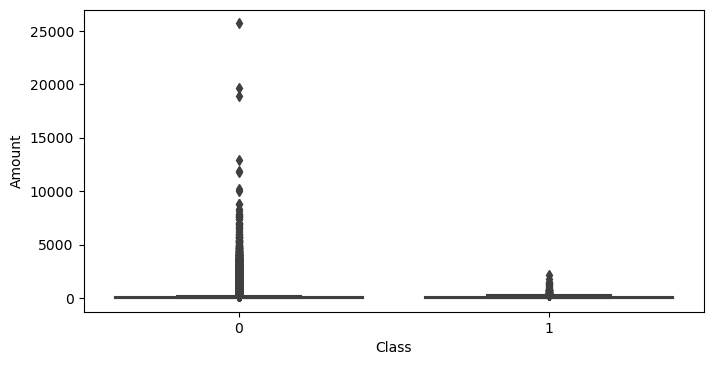

In [30]:
plt.figure(figsize = (8,4) , dpi = 100)
sns.boxplot(x ="Class",y="Amount",data=df)
plt.show()

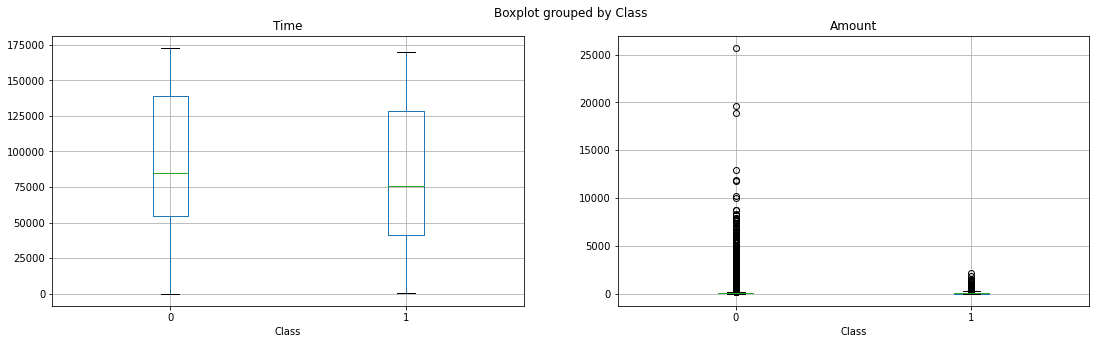

In [31]:
ContinuousColsList=['Time','Amount']
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='Class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [32]:
df[['Amount','Hour','Class']].groupby(['Hour','Class']).mean()

Amount
Hour Class            
0    0       60.136323
     1      303.345000
1    0       62.481266
     1      127.932000
2    0       70.101712
     1       79.262807
3    0       52.264245
     1       13.759412
4    0       77.141368
     1       67.313043
5    0       50.387214
     1      128.788182
6    0       64.957204
     1      111.924444
7    0       67.652537
     1      119.903478
8    0       88.807081
     1       47.887778
9    0      102.867805
     1       78.463125
10   0      109.584374
     1      293.701250
11   0      109.567984
     1      123.976038
12   0      105.941393
     1      200.384706
13   0       98.925988
     1      129.087059
14   0      103.462369
     1      158.309565
15   0      102.024674
     1       85.926538
16   0      103.347603
     1      204.793182
17   0       98.291284
     1      116.327586
18   0       77.029648
     1      192.276970
19   0       77.945983
     1      111.296316
20   0       74.534753
     1       83.911667
21   0       71.667647
     1       64.343750
22   0       69.823340
     1      160.222222
23   0       68.757904
     1      149.672381

In [33]:
comp_df = pd.DataFrame([df[df['Class']==0]['Amount'].describe().to_dict() , df[df['Class']==1]['Amount'].describe().to_dict()])

In [34]:
comp_df

,count,mean,std,min,25%,50%,75%,max
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


## Data Cleaning Treatments ( Missing Values, Outliers, Duplicates)

1. Removinging Duplicates

In [35]:
df.shape

(284807, 33)

In [5]:
# Removing duplicate rows if any
df.drop_duplicates(inplace = True)
df.reset_index(drop = True , inplace = True)

In [6]:
df.shape

(283726, 31)

In [39]:
# Number_of_Duplicates_Deleted
284807-283726

1081

#### There were 1081 duplicates Rows
2. Outlier Treatment


In [41]:
df['Class'].value_counts(normalize = True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [7]:
df = df.drop(df[df['Amount']>20000].index.values[0])
df.reset_index(drop = True , inplace = True)

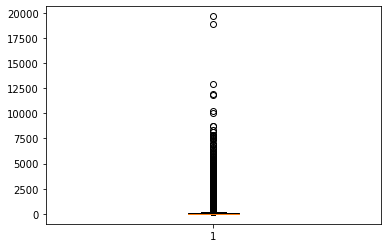

In [8]:
plt.boxplot(df['Amount'])
plt.show()

In [42]:
df.shape

(283725, 33)

In [43]:
# Total data loss(in %)
((284807-283725)*100)/284807

0.3799063927501782

In [12]:
# Converting all column names to lower case so that there is no confusion in column names
df.columns = df.columns.str.lower()

## Statistical Feature Selection

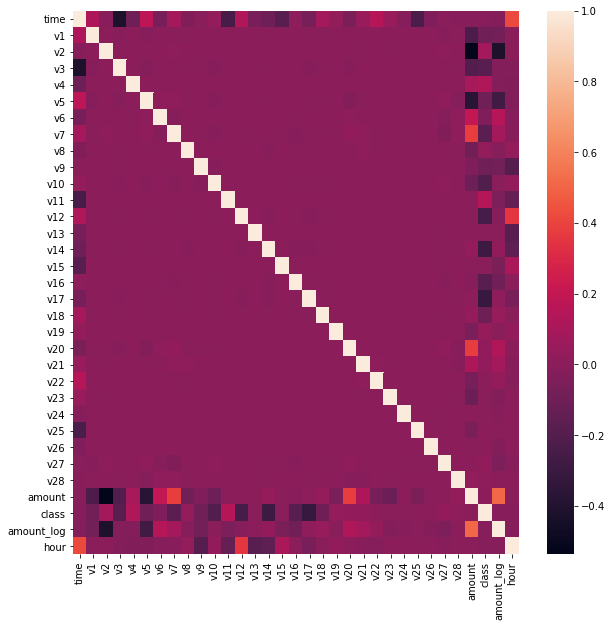

In [45]:
# Plotting a Correlation Plot to observe any correlations or patterns between the columns if the dataset.
corr_matrix = df.corr()
plot = plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix)
plt.show()

In [46]:
# Defining a function to find the statistical relationship(Correltion)
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [47]:
# Calling the function to check which categorical variables are correlated with target

ContinuousVariables=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount']
FunctionAnova(inpData=df, TargetVariable='class', CategoricalPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

time is correlated with class | P-Value: 0.0
v1 is correlated with class | P-Value: 0.0
v2 is correlated with class | P-Value: 0.0
v3 is correlated with class | P-Value: 0.0
v4 is correlated with class | P-Value: 0.0
v5 is correlated with class | P-Value: 0.0
v6 is correlated with class | P-Value: 0.0
v7 is correlated with class | P-Value: 0.0
v8 is correlated with class | P-Value: 0.0
v9 is correlated with class | P-Value: 0.0
v10 is correlated with class | P-Value: 0.0
v11 is correlated with class | P-Value: 0.0
v12 is correlated with class | P-Value: 0.0
v13 is correlated with class | P-Value: 0.0
v14 is correlated with class | P-Value: 0.0
v15 is correlated with class | P-Value: 0.0
v16 is correlated with class | P-Value: 0.0
v17 is correlated with class | P-Value: 0.0
v18 is correlated with class | P-Value: 0.0
v19 is correlated with class | P-Value: 0.0
v20 is correlated with class | P-Value: 0.0
v21 is correlated with class | P-Value: 0.0
v22 is corre

['time',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'amount']

## Selecting final predictors for Machine Learning

In [13]:
#Based on all the above tests, selecting the final columns for machine learning


SelectedColumns=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount']

In [14]:
# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForMLCCfraud.pkl')

In [16]:
#Adding Target Variable Column in Our Final Selected dataframe
DataForML['class']=df['class']

In [17]:
TargetVariable='class'
Predictors=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount']

In [18]:
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [19]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Sandardization of data

In [20]:
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(198607, 30)
(198607,)
(85118, 30)
(85118,)


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Creating the model on Training Data
LOG=logreg.fit(X_train,y_train)
y_pred=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84990
           1       0.88      0.59      0.71       128

    accuracy                           1.00     85118
   macro avg       0.94      0.80      0.85     85118
weighted avg       1.00      1.00      1.00     85118

[[84980    10]
 [   52    76]]
Accuracy of the model on Testing Sample Data: 1.0


In [58]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# 10-Fold Cross validation
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99881406 0.99858143 0.99974931 0.99881021 0.99860964 0.99882467
 0.99956265 0.99889441 0.99929054 0.99891165]

Final Average Accuracy of the model: 1.0


In [59]:
#Calculating roc-auc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred)

0.7968161695493587

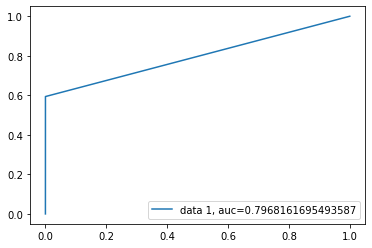

In [60]:
y_pred_proba = logreg.predict_proba(X_test)

from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques

### UnderSampling

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [62]:
from collections import Counter
from sklearn.datasets import make_classification

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283252, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()

LOG=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test)) 

0.9577464788732394


In [65]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.98      0.93      0.96       138

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284

[[144   2]
 [ 10 128]]
Accuracy of the model on Testing Sample Data: 0.96


In [66]:
# 10-Fold Cross validation
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99881406 0.99858143 0.99974931 0.99881021 0.99860964 0.99882467
 0.99956265 0.99889441 0.99929054 0.99891165]

Final Average Accuracy of the model: 1.0


In [67]:
roc_auc_score(y_test , y_pred) 

0.9569188008735358

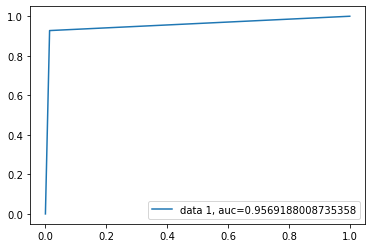

In [68]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### OverSampleing

In [69]:
from imblearn.over_sampling import RandomOverSampler

In [70]:
ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 283252, 1: 283252})


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()

LOG=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [72]:
accuracy_score(y_pred , y_test)

0.9479323573714932

In [73]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84739
           1       0.98      0.92      0.95     85213

    accuracy                           0.95    169952
   macro avg       0.95      0.95      0.95    169952
weighted avg       0.95      0.95      0.95    169952

[[82791  1948]
 [ 6901 78312]]
Accuracy of the model on Testing Sample Data: 0.95


In [74]:
# 10-Fold Cross validation
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99881406 0.99858143 0.99974931 0.99881021 0.99860964 0.99882467
 0.99956265 0.99889441 0.99929054 0.99891165]

Final Average Accuracy of the model: 1.0


In [75]:
roc_auc_score(y_test, y_pred)

0.9480132349340209

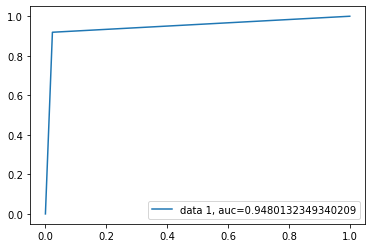

In [76]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### SMOTE

In [78]:
from imblearn.over_sampling import SMOTE


rus = SMOTE(random_state=25)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 283252, 1: 283252})


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
SMOTE=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))

0.9479264733571832


In [81]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     84739
           1       0.97      0.92      0.95     85213

    accuracy                           0.95    169952
   macro avg       0.95      0.95      0.95    169952
weighted avg       0.95      0.95      0.95    169952

[[82570  2169]
 [ 6681 78532]]
Accuracy of the model on Testing Sample Data: 0.95


In [82]:
# 10-Fold Cross validation
Accuracy_Values=cross_val_score(SMOTE, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99881406 0.99858143 0.99974931 0.99881021 0.99860964 0.99882467
 0.99956265 0.99889441 0.99929054 0.99891165]

Final Average Accuracy of the model: 1.0


In [83]:
roc_auc_score(y_test, y_pred)

0.9480001137210109

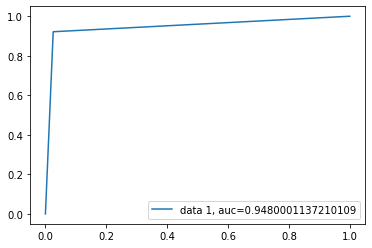

In [84]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### ADASYN

In [85]:
from imblearn.over_sampling import ADASYN

In [86]:
rus = ADASYN(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
ADA=logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))

0.8879689780162877


In [88]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     84765
           1       0.90      0.87      0.89     85179

    accuracy                           0.89    169944
   macro avg       0.89      0.89      0.89    169944
weighted avg       0.89      0.89      0.89    169944

[[76982  7783]
 [11256 73923]]
Accuracy of the model on Testing Sample Data: 0.89


In [89]:
# 10-Fold Cross validation
Accuracy_Values=cross_val_score(ADA, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99881406 0.99858143 0.99974931 0.99881021 0.99860964 0.99882467
 0.99956265 0.99889441 0.99929054 0.99891165]

Final Average Accuracy of the model: 1.0


In [90]:
roc_auc_score(y_test, y_pred)

0.8880180978722712

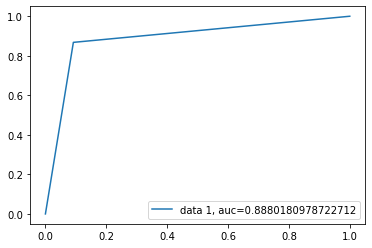

In [91]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## DecisionTreeClassifier

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dte = DecisionTreeClassifier()
Dtree= dte.fit( X_train, y_train )


y_pred = dte.predict(X_test)

In [93]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84995
           1       0.75      0.76      0.75       123

    accuracy                           1.00     85118
   macro avg       0.87      0.88      0.88     85118
weighted avg       1.00      1.00      1.00     85118

[[84964    31]
 [   30    93]]
Accuracy of the model on Testing Sample Data: 1.0


In [94]:
# Running Cross validation
Accuracy_Values=cross_val_score(Dtree , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.0414205  0.99799919 0.99955314 0.99924483 0.99899173 0.99634507
 0.99859134 0.99857722 0.99883089 0.99918858]

Final Average Accuracy of the model: 0.9
0.9992833478230222


In [95]:
 roc_auc_score(y_test, y_pred)

0.8778664168193538

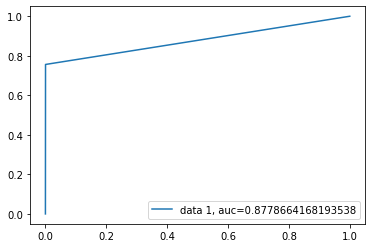

In [96]:
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques


#### UnderSampling

In [97]:
from collections import Counter
from sklearn.datasets import make_classification

rus = RandomUnderSampler(random_state=42)

X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

dte = DecisionTreeClassifier()
DtreeUS = dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [98]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       146
           1       0.87      0.91      0.89       138

    accuracy                           0.89       284
   macro avg       0.89      0.89      0.89       284
weighted avg       0.89      0.89      0.89       284

[[128  18]
 [ 13 125]]
Accuracy of the model on Testing Sample Data: 0.89


In [99]:
# Running Cross validation
Accuracy_Values=cross_val_score(DtreeUS , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.0413529  0.99802421 0.99947932 0.9991796  0.99909471 0.99733914
 0.99868535 0.99879203 0.99909313 0.99899122]

Final Average Accuracy of the model: 0.9
0.8908450704225352


In [100]:
roc_auc_score(y_test, y_pred)

0.8912547151081993

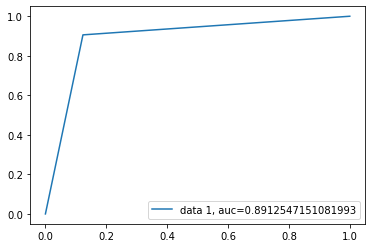

In [101]:
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### OverSampling

In [102]:
ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_over, y_over , test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
DtreeOS = dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [103]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84739
           1       1.00      1.00      1.00     85213

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84680    59]
 [    0 85213]]
Accuracy of the model on Testing Sample Data: 1.0


In [104]:
# Running Cross validation
Accuracy_Values=cross_val_score(DtreeOS , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.0414205  0.99802421 0.99937826 0.9990938  0.9990739  0.99638534
 0.99861888 0.99872877 0.99887916 0.99897238]

Final Average Accuracy of the model: 0.9
0.9996528431557146


In [105]:
roc_auc_score(y_test, y_pred)

0.9996518722194031

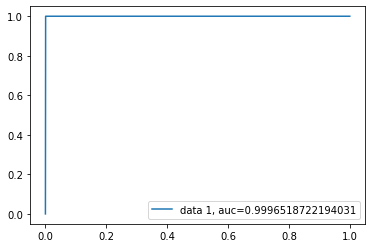

In [106]:
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### ADASYN

In [107]:
rus = ADASYN(random_state=42)

X_adasym, y_adasym = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_adasym, y_adasym, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
Dtree = dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [108]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84765
           1       1.00      1.00      1.00     85179

    accuracy                           1.00    169944
   macro avg       1.00      1.00      1.00    169944
weighted avg       1.00      1.00      1.00    169944

[[84530   235]
 [   60 85119]]
Accuracy of the model on Testing Sample Data: 1.0


In [109]:
# 10-Fold Cross validation
Accuracy_Values=cross_val_score(Dtree , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.0412853  0.99794981 0.99921687 0.999137   0.99908428 0.99712467
 0.99884855 0.99876914 0.9991936  0.99899122]

Final Average Accuracy of the model: 0.9


In [110]:
roc_auc_score(y_test, y_pred)

0.9982616151782825

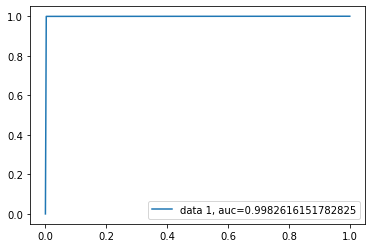

In [111]:
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## RandomForestClassifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
RANF=rf.fit(X_train, y_train)

y_pred = RANF.predict(X_test)

In [113]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84995
           1       0.93      0.76      0.83       123

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

[[84988     7]
 [   30    93]]
Accuracy of the model on Testing Sample Data: 1.0


In [114]:
# Running Cross validation
Accuracy_Values=cross_val_score(RANF , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.044796   0.99879296 0.99982468 0.99942245 0.99939586 0.9989492
 0.99967389 0.99954614 0.99946344 0.99942119]

Final Average Accuracy of the model: 0.9
0.9995653093352758


In [115]:
roc_auc_score(y_test, y_pred)

0.8780076015949289

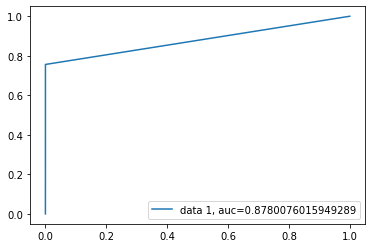

In [116]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques



#### UnderSampling

In [117]:
rus = RandomUnderSampler(random_state=32)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
RANF = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [63]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84739
           1       1.00      1.00      1.00     85213

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84723    16]
 [    0 85213]]
Accuracy of the model on Testing Sample Data: 1.0


In [120]:
roc_auc_score(y_test, y_pred)

0.9359737939249554

In [121]:
accuracy_score(y_pred , y_test)

0.9366197183098591

#### OverSampling

In [55]:
from sklearn.ensemble import RandomForestClassifier

ros = RandomOverSampler(random_state=25) 
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
RANF = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [56]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84739
           1       1.00      1.00      1.00     85213

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84723    16]
 [    0 85213]]
Accuracy of the model on Testing Sample Data: 1.0


In [ ]:
# 10-Fold Cross validation
Accuracy_Values=cross_val_score(RANF , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [58]:
roc_auc_score(y_test, y_pred)

0.9999055924662787

#### ADASYN

In [126]:
ada = ADASYN(random_state=25)

X_adasym, y_adasym = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_adasym, y_adasym, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
RANF = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [127]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84765
           1       1.00      1.00      1.00     85179

    accuracy                           1.00    169944
   macro avg       1.00      1.00      1.00    169944
weighted avg       1.00      1.00      1.00    169944

[[84742    23]
 [    0 85179]]
Accuracy of the model on Testing Sample Data: 1.0


In [128]:
# Running Cross validation
Accuracy_Values=cross_val_score(RANF , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.06585299 0.9987722  0.99985752 0.99950599 0.99943717 0.99899122
 0.99978623 0.99950509 0.99946344 0.99942119]

Final Average Accuracy of the model: 0.91
0.999864661300193


In [129]:
roc_auc_score(y_test, y_pred)

0.9998643307969092

## AdaBoostClassifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [131]:
adab = AdaBoostClassifier()
adab

# Creating the model on Training Data
AB= adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)

In [132]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     84765
           1       0.94      0.94      0.94     85179

    accuracy                           0.94    169944
   macro avg       0.94      0.94      0.94    169944
weighted avg       0.94      0.94      0.94    169944

[[79445  5320]
 [ 5417 79762]]
Accuracy of the model on Testing Sample Data: 0.94


In [133]:
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.26300385 0.99933613 0.99927165 0.99920248 0.99943717 0.99873041
 0.99954421 0.99843133 0.99913533 0.99863885]

Final Average Accuracy of the model: 0.93
0.936820364355317


In [134]:
roc_auc_score(y_test, y_pred)

0.9368213798836805

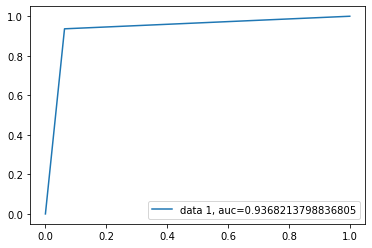

In [135]:
pred_proba = adab.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques


#### UnderSampling

In [136]:
rus = RandomUnderSampler(random_state=21)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
ab = AdaBoostClassifier()
ADAB = ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [137]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       146
           1       0.96      0.93      0.95       138

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284

[[141   5]
 [  9 129]]
Accuracy of the model on Testing Sample Data: 0.95


In [138]:
# Running Cross validation
Accuracy_Values=cross_val_score(ADAB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.26300385 0.99933613 0.99927165 0.99920248 0.99943717 0.99873041
 0.99954421 0.99843133 0.99913533 0.99863885]

Final Average Accuracy of the model: 0.93
0.9507042253521126


In [139]:
roc_auc_score(y_test, y_pred)

0.9502680166765932

#### overSampling

In [140]:
ros = RandomOverSampler(random_state=21)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
ab = AdaBoostClassifier()
ADAB = ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [141]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     84739
           1       0.98      0.95      0.97     85213

    accuracy                           0.97    169952
   macro avg       0.97      0.97      0.97    169952
weighted avg       0.97      0.97      0.97    169952

[[83155  1584]
 [ 4021 81192]]
Accuracy of the model on Testing Sample Data: 0.97


In [142]:
# Running Cross validation
Accuracy_Values=cross_val_score(ADAB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.26300385 0.99933613 0.99927165 0.99920248 0.99943717 0.99873041
 0.99954421 0.99843133 0.99913533 0.99863885]

Final Average Accuracy of the model: 0.93
0.9670200997928827


In [143]:
roc_auc_score(y_test, y_pred)

0.9670598363169071

#### ADASYN

In [144]:
ada = ADASYN(random_state=42)

X_adasyn, y_adasyn = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)
ab = AdaBoostClassifier()
ADAB = ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [145]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     84765
           1       0.94      0.93      0.93     85179

    accuracy                           0.93    169944
   macro avg       0.93      0.93      0.93    169944
weighted avg       0.93      0.93      0.93    169944

[[79445  5320]
 [ 5857 79322]]
Accuracy of the model on Testing Sample Data: 0.93


In [146]:
# Running Cross validation
Accuracy_Values=cross_val_score(ADAB , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))


Accuracy values for 10-fold Cross Validation:
 [0.26300385 0.99933613 0.99927165 0.99920248 0.99943717 0.99873041
 0.99954421 0.99843133 0.99913533 0.99863885]

Final Average Accuracy of the model: 0.93
0.9342312761850963


In [147]:
roc_auc_score(y_test, y_pred)

0.9342385836545629

## XGBClassifier

In [148]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
xgb=XGBClassifier()

# Creating the model on Training Data
XG=xgb.fit(X_train,y_train)
prediction=xgb.predict(X_test)

[14:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [149]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('F1 Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84995
           1       0.94      0.76      0.84       123

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

[[84989     6]
 [   29    94]]
F1 Accuracy of the model on Testing Sample Data: 1.0


In [ ]:
# Running Cross validation
Accuracy_Values=cross_val_score(XG , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test))

In [151]:
roc_auc_score(y_test, prediction)

0.8820785249443176

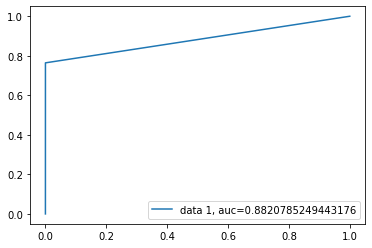

In [152]:
pred_proba = xgb.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques


#### UnderSampling

In [153]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
xgb = XGBClassifier()
XG= xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

Resampled dataset shape Counter({0: 473, 1: 473})
[20:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [154]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.98      0.93      0.96       138

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284

[[144   2]
 [ 10 128]]
Accuracy of the model on Testing Sample Data: 0.96


In [156]:
roc_auc_score(y_test, y_pred)

0.9569188008735358

#### OverSampling

In [157]:
ros = RandomOverSampler(random_state=21)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
xgb = XGBClassifier()
XG= xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

Resampled dataset shape Counter({0: 473, 1: 473})
[20:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [158]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84739
           1       1.00      1.00      1.00     85213

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84719    20]
 [    0 85213]]
Accuracy of the model on Testing Sample Data: 1.0


In [159]:
roc_auc_score(y_test, y_pred)

0.9998819905828484

#### ADASYN

In [160]:
rus = ADASYN(random_state=25)

X_adasyn, y_adasyn = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)
xgb = XGBClassifier()
XG= xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

Resampled dataset shape Counter({0: 473, 1: 473})
[20:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [161]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84765
           1       1.00      1.00      1.00     85179

    accuracy                           1.00    169944
   macro avg       1.00      1.00      1.00    169944
weighted avg       1.00      1.00      1.00    169944

[[84692    73]
 [    0 85179]]
Accuracy of the model on Testing Sample Data: 1.0


In [162]:
roc_auc_score(y_test, y_pred)

0.9995693977467115

##  KNeighborsClassifier

In [163]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [164]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84765
           1       1.00      1.00      1.00     85179

    accuracy                           1.00    169944
   macro avg       1.00      1.00      1.00    169944
weighted avg       1.00      1.00      1.00    169944

[[84571   194]
 [    0 85179]]


In [165]:
roc_auc_score(y_test, prediction)

0.9988556597652333

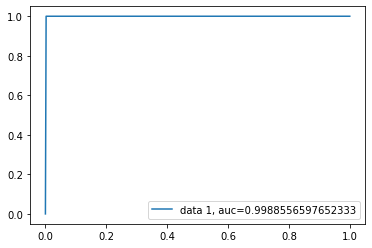

In [166]:
pred_proba = KNN.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques
#### UnderSampling

In [168]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
KN= knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       146
           1       0.99      0.89      0.94       138

    accuracy                           0.94       284
   macro avg       0.95      0.94      0.94       284
weighted avg       0.95      0.94      0.94       284

[[145   1]
 [ 15 123]]
Accuracy of the model on Testing Sample Data: 0.94


In [169]:
# Running Cross validation
Accuracy_Values=cross_val_score(KN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99873375 0.99863321 0.99978853 0.99933646 0.99926311 0.99852468
 0.99948976 0.99946344 0.99954614 0.99931014]

Final Average Accuracy of the model: 1.0


In [170]:
roc_auc_score(y_test, y_pred)

0.9422275163787969

#### OverSampling

In [171]:
rus = RandomOverSampler(random_state=42) 
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
KN= knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283252})


In [172]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84739
           1       1.00      1.00      1.00     85213

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84659    80]
 [    0 85213]]
Accuracy of the model on Testing Sample Data: 1.0


In [173]:
# Running Cross validation
Accuracy_Values=cross_val_score(KN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99873375 0.99863321 0.99978853 0.99933646 0.99926311 0.99852468
 0.99948976 0.99946344 0.99954614 0.99931014]

Final Average Accuracy of the model: 1.0


In [174]:
roc_auc_score(y_test, y_pred)

0.9995279623313941

#### ADASYN

In [175]:
rus = ADASYN(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
KN= knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [176]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84765
           1       1.00      1.00      1.00     85179

    accuracy                           1.00    169944
   macro avg       1.00      1.00      1.00    169944
weighted avg       1.00      1.00      1.00    169944

[[84572   193]
 [    0 85179]]
Accuracy of the model on Testing Sample Data: 1.0


In [177]:
# Running Cross validation
Accuracy_Values=cross_val_score(KN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99873375 0.99863321 0.99978853 0.99933646 0.99926311 0.99852468
 0.99948976 0.99946344 0.99954614 0.99931014]

Final Average Accuracy of the model: 1.0


In [178]:
roc_auc_score(y_test, y_pred)

0.9988615584262373

## Support Vector Machine (SVM)

In [179]:
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)
clf
# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

In [180]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('F1 Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84765
           1       1.00      1.00      1.00     85179

    accuracy                           1.00    169944
   macro avg       1.00      1.00      1.00    169944
weighted avg       1.00      1.00      1.00    169944

[[84714    51]
 [   36 85143]]
F1 Accuracy of the model on Testing Sample Data: 1.0


In [181]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99744544 0.99797199 0.99784673 0.99835095 0.99838367 0.99585643
 0.99749822 0.99813852 0.99799649 0.99792239]

Final Average Accuracy of the model: 1.0


In [182]:
roc_auc_score(y_test, y_pred)

0.9988615584262373

## Fixing the class Imbalance and apply sampling techniques


#### UnderSampling

In [184]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
svm =svm.SVC()
SV= svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

Resampled dataset shape Counter({0: 473, 1: 473})


In [185]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       146
           1       0.99      0.88      0.93       138

    accuracy                           0.94       284
   macro avg       0.94      0.93      0.94       284
weighted avg       0.94      0.94      0.94       284

[[145   1]
 [ 17 121]]
Accuracy of the model on Testing Sample Data: 0.94


In [188]:
# Running Cross validation
Accuracy_Values=cross_val_score(SV , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.99833592 0.99824548 0.99861614 0.99920248 0.99906966 0.99881982
 0.99780102 0.99924561 0.99929054 0.99934401]

Final Average Accuracy of the model: 1.0


In [187]:
roc_auc_score(y_test, y_pred)

0.9349811395672026

#### OverSampling

In [193]:
from sklearn import svm

rus = RandomOverSampler(random_state=42) 
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
svmc = svm.SVC(C=2, kernel='rbf', gamma=0.1)
SV= svmc.fit(X_train, y_train)

y_pred = svmc.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283252})


In [194]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84739
           1       1.00      1.00      1.00     85213

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

[[84692    47]
 [    0 85213]]
Accuracy of the model on Testing Sample Data: 1.0


In [196]:
roc_auc_score(y_test, y_pred)

0.9997226778696939

## Naive Bayes

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [22]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

In [23]:
from sklearn import metrics


print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84990
           1       0.05      0.83      0.10       128

    accuracy                           0.98     85118
   macro avg       0.53      0.90      0.54     85118
weighted avg       1.00      0.98      0.99     85118

[[83125  1865]
 [   22   106]]
Accuracy of the model on Testing Sample Data: 0.99


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(prediction , y_test ))


Accuracy values for 10-fold Cross Validation:
 [0.98512171 0.98749634 0.98616216 0.98862511 0.98851551 0.98683728
 0.98626226 0.98447796 0.9880957  0.98870605]

Final Average Accuracy of the model: 0.99
0.9778307760990624


In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc_score(y_test, prediction)

0.9030906209554066

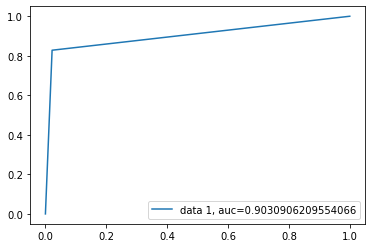

In [29]:
pred_proba = NB.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  prediction)

auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing the class Imbalance and apply sampling techniques
#### UnderSampling

In [33]:
from collections import Counter
from sklearn.datasets import make_classification


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
gnb =  GaussianNB()
GN= gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Resampled dataset shape Counter({0: 473, 1: 473})


In [34]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       146
           1       0.98      0.87      0.92       138

    accuracy                           0.93       284
   macro avg       0.94      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284

[[144   2]
 [ 18 120]]
Accuracy of the model on Testing Sample Data: 0.93


In [35]:
# Running Cross validation
Accuracy_Values=cross_val_score(GN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test ))


Accuracy values for 10-fold Cross Validation:
 [0.98512171 0.98749634 0.98616216 0.98862511 0.98851551 0.98683728
 0.98626226 0.98447796 0.9880957  0.98870605]

Final Average Accuracy of the model: 0.99
0.9295774647887324


In [36]:
roc_auc_score(y_test, y_pred)

0.9279332936271588

#### OverSampling

In [37]:
rus = RandomOverSampler(random_state=42) 
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
gnb =  GaussianNB()
GN= gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283252})


In [38]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     84739
           1       0.97      0.86      0.91     85213

    accuracy                           0.92    169952
   macro avg       0.92      0.92      0.92    169952
weighted avg       0.92      0.92      0.92    169952

[[82440  2299]
 [11900 73313]]
Accuracy of the model on Testing Sample Data: 0.92


In [39]:
# Running Cross validation
Accuracy_Values=cross_val_score(GN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test ))


Accuracy values for 10-fold Cross Validation:
 [0.98512171 0.98749634 0.98616216 0.98862511 0.98851551 0.98683728
 0.98626226 0.98447796 0.9880957  0.98870605]

Final Average Accuracy of the model: 0.99
0.9164528808134061


In [40]:
roc_auc_score(y_test, y_pred)

0.916609790800632

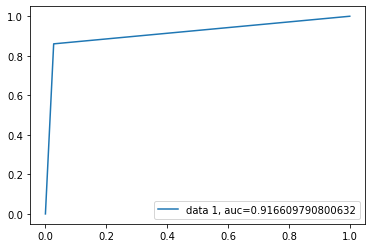

In [41]:
y_pred_proba =GN.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### SMOTE

In [42]:
rus = SMOTE(random_state=25) 
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

gnb =  GaussianNB()
GN= gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283252})


In [43]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     84739
           1       0.97      0.85      0.91     85213

    accuracy                           0.91    169952
   macro avg       0.92      0.91      0.91    169952
weighted avg       0.92      0.91      0.91    169952

[[82580  2159]
 [12990 72223]]
Accuracy of the model on Testing Sample Data: 0.91


In [46]:
# Running Cross validation
Accuracy_Values=cross_val_score(GN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test ))


Accuracy values for 10-fold Cross Validation:
 [0.98512171 0.98749634 0.98616216 0.98862511 0.98851551 0.98683728
 0.98626226 0.98447796 0.9880957  0.98870605]

Final Average Accuracy of the model: 0.99
0.9108630672189795


In [45]:
roc_auc_score(y_test, y_pred)

0.9110401189811456

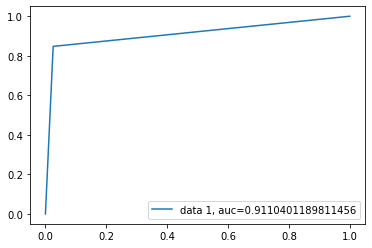

In [47]:
y_pred_proba =GN.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### ADASYN

In [48]:
rus = ADASYN(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

gnb =  GaussianNB()
GN= gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Resampled dataset shape Counter({0: 283252, 1: 283228})


In [49]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77     84765
           1       0.91      0.48      0.63     85179

    accuracy                           0.72    169944
   macro avg       0.78      0.72      0.70    169944
weighted avg       0.78      0.72      0.70    169944

[[80864  3901]
 [44167 41012]]
Accuracy of the model on Testing Sample Data: 0.7


In [50]:
# Running Cross validation
Accuracy_Values=cross_val_score(GN , X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print(accuracy_score(y_pred , y_test ))


Accuracy values for 10-fold Cross Validation:
 [0.98512171 0.98749634 0.98616216 0.98862511 0.98851551 0.98683728
 0.98626226 0.98447796 0.9880957  0.98870605]

Final Average Accuracy of the model: 0.99
0.7171538859859719


In [51]:
roc_auc_score(y_test, y_pred)

0.7177294119430536

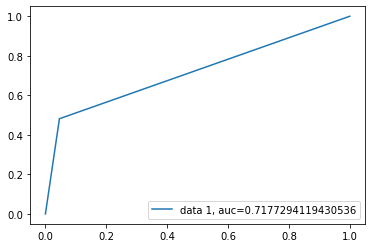

In [53]:
y_pred_proba =gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# FINAL OUTPUT FROM ALL THE MODELS
## Few of our models were very robust/good , they had similar king of accuracy, f1 Score, cross validation and roc_auc score
1. Oversampling in Random Forest
2. Oversampling in XGBoost
3. Oversampling in SVM

## But I am choosing Random forest OverSampling Model for deployment 
#### Ramdom Forest oversampling more is havingw:
#### a. Accuracy- 99.99%
#### b. Cross Validation- 100%
#### c. Roc_Auc score- 99.99%

### confusion Matrix- True Positive-84725 ,True Negative-85213 , False Positive-0 , False Negative-14 

#### Choosimg Ramdom Forest Oversampled data over others because it is faster than other two and it had better confusion matrix 